<a href="https://colab.research.google.com/github/Kgs-Mathaba/TensorFlow_DC_ZTM/blob/main/03_Introduction__to_computer_vision_and_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to computer vision in tensorflow
**Main Reference**: https://poloclub.github.io/cnn-explainer/



In [177]:
# Get the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip # link to google storage bucket for the ZTM tensorflow course

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-06-27 17:03:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.3’

pizza_steak.zip.3   100%[===================>] 104.50M   151MB/s    in 0.7s    

2021-06-27 17:03:10 (151 MB/s) - ‘pizza_steak.zip.3’ saved [109579078/109579078]



## This data is a modified version of the food 101 dataset, this data only contains pictures of pizza and steak. This is a smaller dataset to start experimenting with.

### Inspect the data (becoming one with the data)


In [178]:
!ls pizza_steak

test  train


In [179]:
!ls pizza_steak/train

pizza  steak


In [180]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [181]:
import os

# Walk through the pizza steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 1 images in 'pizza_steak.
There are 2 directories and 1 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/steak.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.
There are 2 directories and 1 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/steak.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.


In [182]:
!ls pizza_steak

test  train


In [183]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 27 16:06 .
drwxr-xr-x 1 root root 4096 Jun 27 17:03 ..
-rw-r--r-- 1 root root 6148 Jun 27 17:03 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 27 16:06 test
drwxr-xr-x 4 root root 4096 Jun 27 16:06 train


In [184]:
# another way  to find out how mant images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

In [185]:
# Get class names, view images
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list  of class names from the subdirectory
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [186]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


array([[[ 90,  95,  72],
        [ 76,  81,  59],
        [ 70,  74,  57],
        ...,
        [105, 100,  96],
        [ 72,  69,  62],
        [ 54,  51,  44]],

       [[ 73,  78,  56],
        [ 73,  78,  58],
        [ 78,  82,  65],
        ...,
        [157, 152, 146],
        [133, 129, 120],
        [ 93,  90,  81]],

       [[ 69,  74,  54],
        [ 75,  79,  62],
        [ 83,  87,  72],
        ...,
        [167, 160, 150],
        [161, 157, 146],
        [149, 145, 134]],

       ...,

       [[173,  44,  12],
        [170,  41,   9],
        [167,  38,   6],
        ...,
        [195, 168,  63],
        [199, 172,  67],
        [204, 177,  72]],

       [[172,  43,  11],
        [172,  43,  11],
        [169,  40,   8],
        ...,
        [194, 166,  57],
        [195, 167,  57],
        [198, 170,  60]],

       [[169,  39,   7],
        [173,  43,  11],
        [174,  44,  12],
        ...,
        [188, 160,  50],
        [186, 156,  44],
        [187, 157,  45]]

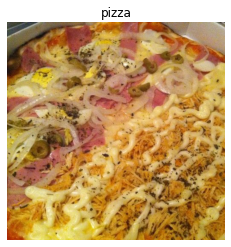

In [187]:
# view random image from trainind dataset
view_random_image( target_dir='pizza_steak/train/',
                  target_class='pizza')

Image shape: (512, 512, 3)


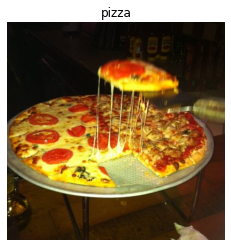

In [188]:
img = view_random_image( target_dir='pizza_steak/train/',
                  target_class='pizza')

In [189]:
img.shape

(512, 512, 3)

## An end-to-end example

I will
- Load the images
- Preprocess the images
- Build a CNN to find patterns in the images
- Fit the CNN to the training data

In [190]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

#preprocess the data by scaling it
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to the data directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=1,
                        steps_per_epoch=len(train_data),
                        validation_steps =len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
47/47 [==============================] - 7s 144ms/step - loss: 0.5556 - accuracy: 0.7073


# Training with CPU
- Found 1500 images belonging to 2 classes.
-Found 500 images belonging to 2 classes.
-Epoch 1/5
-47/47 [==============================] - 100s 2s/step - loss: 0.6080 - accuracy: 0.6420
-Epoch 2/5
47/47 [==============================] - 98s 2s/step - loss: 0.4390 - accuracy: 0.8153
-Epoch 3/5
47/47 [==============================] - 98s 2s/step - loss: 0.4030 - accuracy: 0.8227
-Epoch 4/5
47/47 [==============================] - 98s 2s/step - loss: 0.3618 - accuracy: 0.8447
-Epoch 5/5
47/47 [==============================] - 98s 2s/step - loss: 0.3142 - accuracy: 0.8680

# Training with GPU

- Found 1500 images belonging to 2 classes.
- Found 500 images belonging to 2 classes.
- Epoch 1/5
47/47 [==============================] - 39s 146ms/step - loss: 0.5465 - accuracy: 0.7180
- Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4128 - accuracy: 0.8140
- Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3806 - accuracy: 0.8280
- Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3524 - accuracy: 0.8560
- Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3330 - accuracy: 0.8593

In [191]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 28090)           

# Using the same model as before

In [192]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs=1,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

47/47 [==============================] - 9s 177ms/step - loss: 1.3122 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000


In [193]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [194]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation= 'relu'),
  tf.keras.layers.Dense(100, activation= 'relu'),
  tf.keras.layers.Dense(100, activation= 'relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])
  
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data, 
            epochs=1,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

47/47 [==============================] - 9s 179ms/step - loss: 1.7033 - accuracy: 0.6680 - val_loss: 0.8163 - val_accuracy: 0.6640


In [195]:
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [196]:
1-1

0

# Binary Classification: Breakdown

1. 

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


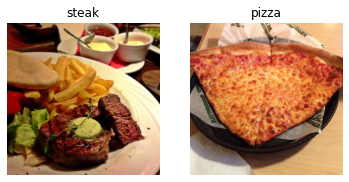

In [197]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', "pizza")
plt.show()

### 2. Preprocess the data (prepare it for a model)

In [198]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Turn data into batches

In [199]:
!nvidia-smi

Sun Jun 27 17:03:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    33W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [200]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255. ) # this will rescale the pixel numbers to be between 0 and 1

In [201]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.


In [202]:
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 500 images belonging to 2 classes.


# get sample of training data batch

In [203]:
images, labels = train_data.next() # get next batch of training images
len(images), len(labels)

(32, 32)

In [204]:
images.shape

(32, 224, 224, 3)

In [205]:
type(images)

numpy.ndarray

In [206]:
images[0]

array([[[0.01960784, 0.01568628, 0.00784314],
        [0.01960784, 0.01568628, 0.00784314],
        [0.01960784, 0.01568628, 0.00784314],
        ...,
        [0.04313726, 0.03137255, 0.01176471],
        [0.03921569, 0.02745098, 0.00784314],
        [0.03921569, 0.02745098, 0.00784314]],

       [[0.01568628, 0.01176471, 0.00392157],
        [0.02352941, 0.01960784, 0.01176471],
        [0.02745098, 0.02352941, 0.01568628],
        ...,
        [0.03921569, 0.01960784, 0.00392157],
        [0.03529412, 0.01568628, 0.        ],
        [0.03921569, 0.01960784, 0.00392157]],

       [[0.01960784, 0.01568628, 0.00784314],
        [0.02352941, 0.01960784, 0.01176471],
        [0.02745098, 0.02352941, 0.01568628],
        ...,
        [0.0509804 , 0.01960784, 0.00784314],
        [0.0509804 , 0.01960784, 0.00784314],
        [0.0509804 , 0.01960784, 0.00784314]],

       ...,

       [[0.24705884, 0.14509805, 0.03921569],
        [0.23529413, 0.13333334, 0.02745098],
        [0.24705884, 0

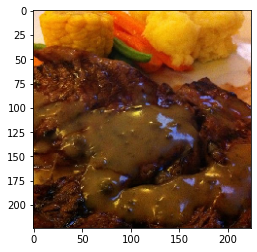

In [207]:
plt.imshow(images[18])

In [208]:
labels.shape

(32,)

# 3. Create a CNN model (start with a baseline)

In [209]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [210]:
# Create the baseline model
model_4 = Sequential([
  Conv2D(filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)),
  Conv2D(10,3, activation='relu'),
  Conv2D(10,3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])


In [211]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [212]:
model_4.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_22 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [213]:
# Fit the model
# check the lengths of the training and testing data generators
len(train_data), len(test_data)

(47, 16)

In [214]:
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=2,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/2
47/47 [==============================] - 10s 197ms/step - loss: 2.0109 - accuracy: 0.6433 - val_loss: 0.4939 - val_accuracy: 0.7980
Epoch 2/2
47/47 [==============================] - 9s 188ms/step - loss: 0.4655 - accuracy: 0.7920 - val_loss: 0.4120 - val_accuracy: 0.8280


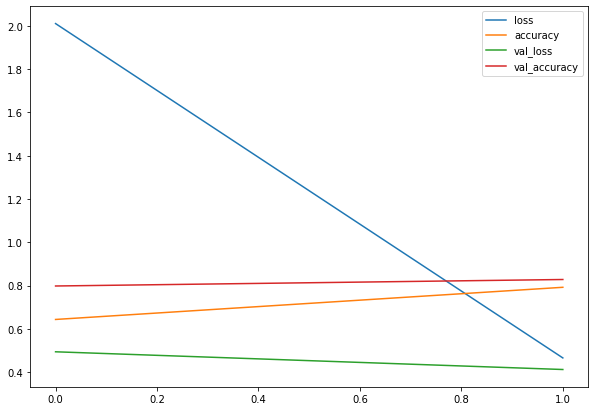

In [215]:
# Evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [216]:
# Plot the validation and training separately
def plot_loss_curves(history):
  """
  Returns separte loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot the accuracy
  plt.figure()
  plt.plot(epochs, loss, label='training_accuracy')
  plt.plot(epochs, val_loss, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

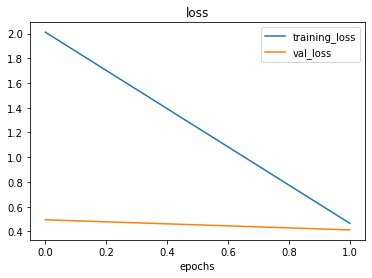

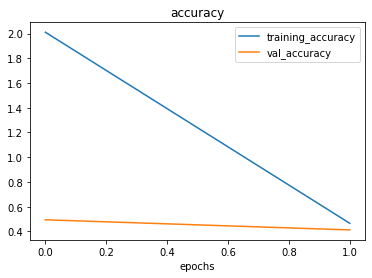

In [217]:
# check out the loss and accuracy
plot_loss_curves(history_4)

# The model seems to be overfitting at 20 epochs 

In [218]:
# Adjust the model parameters

In [219]:
model_4.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_22 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [220]:
# create another baseline model
model_5 = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [221]:
# Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fir the model
history_5 = model_5.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/2
47/47 [==============================] - 9s 186ms/step - loss: 0.6312 - accuracy: 0.6393 - val_loss: 0.5279 - val_accuracy: 0.7460
Epoch 2/2
47/47 [==============================] - 9s 182ms/step - loss: 0.5033 - accuracy: 0.7667 - val_loss: 0.4319 - val_accuracy: 0.8200


In [222]:
model_4.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_22 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [223]:
model_5.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 6760)            

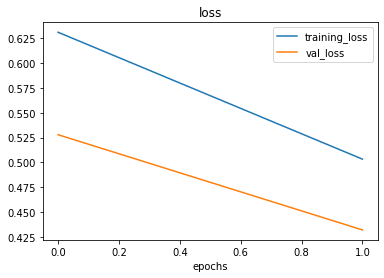

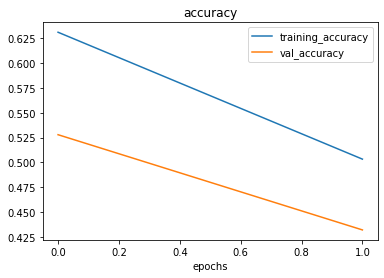

In [224]:
# check out the loss and accuracy
plot_loss_curves(history_5)

## MaxPool2D has reduced the overfitting (Regularized)

# Try Data Augmentation

Data augmentation is the process of altering the training data, leading it to have more diversity, this will in turn allowing the model to learn more generalized patterns.

In [225]:
# Create ImageDataGenerator training instance with data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2, # how much you roate the image
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          zca_epsilon=1e-06,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True)

In [226]:
# Create ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


In [227]:
#  Import data from the training directory and augment it
print("Augmented training data")
train_data_augmented_shuffled = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True) # for demontration purposes only

# Create non augmented data batched
print("Non-augmented train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False
                                                )

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented train data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


# Data augmentation is usually applied to the training data

In [228]:
# view augmented data
images, labels  = train_data.next()
augmented_images, augmented_labels = train_data_augmented_shuffled.next()

showing image number:30


(-0.5, 223.5, 223.5, -0.5)

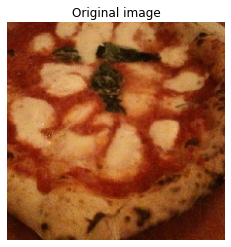

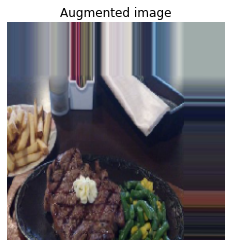

In [229]:
# original image vs augmented image
import random
random_number = random.randint(0, 32)
print(f'showing image number:{random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

In [230]:

# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6307 - accuracy: 0.6367 - val_loss: 0.4662 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5399 - accuracy: 0.7367 - val_loss: 0.3939 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5117 - accuracy: 0.7587 - val_loss: 0.3719 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5033 - accuracy: 0.7613 - val_loss: 0.3593 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4792 - accuracy: 0.7667 - val_loss: 0.4283 - val_accuracy: 0.8080


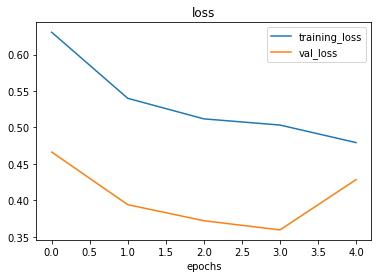

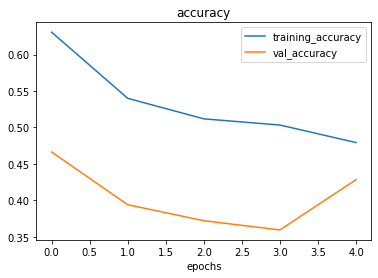

In [231]:
# check out the loss and accuracy
plot_loss_curves(history_6)

## Shuffling the data goes a long way in improving the perfomance of the model. The model doesn't learn patterns for pizza then halfway learn patterns for steak. The images are randomly mixed

# Repeat until satisfied

# Making predictions

In [232]:
model_6.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 6760)            

In [233]:
print(class_names)

['pizza' 'steak']


In [255]:
steak = mpimg.imread('/content/Steak-Resting-sml-jpeg.jpg')

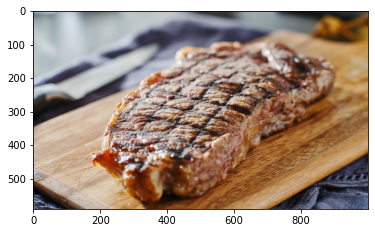

In [238]:
plt.imshow(steak)

In [295]:
model_6.predict(steak_resize)

array([[0.]], dtype=float32)

In [253]:
#steak.shape

(591, 1000, 3)

In [258]:
steak_reshape = tf.image.resize(steak, [224,224])

In [259]:
steak_reshape.shape

TensorShape([224, 224, 3])

In [260]:
steak_resize = tf.expand_dims(steak_reshape, axis=0)

In [287]:
steak_resize.shape

TensorShape([1, 224, 224, 3])

In [296]:
def load_and_pred_image(filename, img_shape=224):
  """
  loads and prepares an image to be loaded to the model
  """
  # Read image
  img = tf.io.read_file(filename)
  #Decode read file
  img = tf.image.decode_image(img)
  # Resize image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # apply scaling
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

In [284]:
stake_img = load_and_pred_image("/content/Steak-Resting-sml-jpeg.jpg")

In [288]:
stake_img.shape

TensorShape([1, 224, 224, 3])

In [280]:
tf.expand_dims(steak_img, axis=0).shape

TensorShape([1, 512, 512, 3])

In [292]:
stake_img.dtype

tf.float32

In [293]:
steak_resize.dtype

tf.float32

In [294]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [308]:
pizza = load_and_pred_image('/content/pizza.jpeg')

In [309]:
pizza.shape

TensorShape([1, 224, 224, 3])

In [299]:
model_6.predict(pizza)

array([[0.15534963]], dtype=float32)

In [300]:
steak1 = load_and_pred_image('/content/steak1.jpg')

In [302]:
pred = model_6.predict(steak1)

In [303]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [310]:
def pred_and_plot(model, filename, class_names= class_names):
  """
  Imports image and makes prediction, return the class name of predicted image
  """

  img = load_and_pred_image(filename)

  # Make a prediction
  pred = model.predict(img)

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f'Prediction:{pred_class}')
  plt.axis(False)

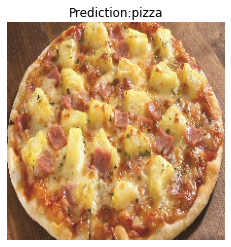

In [311]:
# Test model on custome image
pred_and_plot(model_6, "/content/pizza.jpeg")

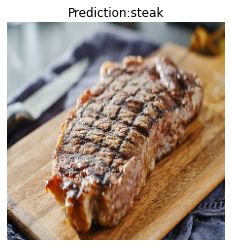

In [312]:
pred_and_plot(model_6, "/content/Steak-Resting-sml-jpeg.jpg")

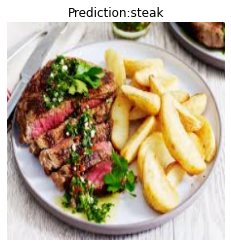

In [313]:
pred_and_plot(model_6, "/content/steak2.jpeg")

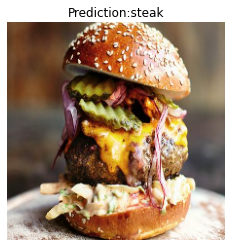

In [314]:
pred_and_plot(model_6, "/content/burger.jpg")